In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from numpy.random import default_rng
from lmfit.models import SineModel
from scipy.optimize import curve_fit
%matplotlib inline

In [55]:
TagTable = {
    'Tag1' : '9990 1912 9990 9990 9990 0097',
    'Tag2' : '9990 1912 9990 9990 9990 0098',
    'Tag3' : '9990 1912 9990 9990 9990 0099',
    'Tag4' : '9990 1912 9990 9990 9990 0100',
    'Tag5' : '9990 1912 9990 9990 9990 0101',
    'Tag6' : '9990 1912 9990 9990 9990 0102',
    'Tag7' : '9990 1912 9990 9990 9990 0103',
    'Tag8' : '9990 1912 9990 9990 9990 0104',
    'Tag9' : '9990 1912 9990 9990 9990 0105',
    'Tag10' : '9990 1912 9990 9990 9990 0106',
}

In [56]:
def inverse_lookup(d, x):
    for k,v in d.items():
        if x == v:
            return k

In [57]:
c = 2.998e8 #光の速度
f = 920.4e6 #周波数
wavelength = c / f * 100
print(wavelength)

32.57279443720122


In [58]:
RSSI0 = -58.5

In [59]:
def culDistance(value):
    return pow(10, (RSSI0 - value)/20) * 100

In [60]:
rfiddf=pd.read_csv('results2.csv')
data_size = len(rfiddf)
rfiddf.head()

,Tag ID,RSSI,Phase,Frequency,Antenna No,Created At
0,9990 1912 9990 9990 9990 0139,-61.5,3.761321,920.4,1,12/5/2022 6:04:36 PM
1,9990 1912 9990 9990 9990 0100,-64.0,5.718680,920.4,1,12/5/2022 6:04:36 PM
2,9990 1912 9990 9990 9990 0122,-61.0,2.135301,920.4,1,12/5/2022 6:04:36 PM
3,9990 1912 9990 9990 9990 0098,-55.0,2.515728,920.4,1,12/5/2022 6:04:36 PM
4,9990 1912 9990 9990 9990 0113,-59.0,1.619884,920.4,1,12/5/2022 6:04:36 PM


In [61]:
rfiddf.describe()

,RSSI,Phase,Frequency,Antenna No
count,510.000000,510.000000,5.100000e+02,510.0
mean,-51.240196,3.446831,9.204000e+02,1.0
std,8.669417,2.506872,2.275969e-13,0.0
min,-69.000000,0.000000,9.204000e+02,1.0
25%,-58.000000,0.742447,9.204000e+02,1.0
50%,-54.500000,3.911651,9.204000e+02,1.0
75%,-43.000000,6.092972,9.204000e+02,1.0
max,-34.500000,6.277049,9.204000e+02,1.0


In [62]:
rfiddf.loc[1]

Tag ID        9990 1912 9990 9990 9990 0100
RSSI                                  -64.0
Phase                               5.71868
Frequency                             920.4
Antenna No                                1
Created At             12/5/2022 6:04:36 PM
Name: 1, dtype: object

In [63]:
def getMean(rfiddf):
    columns = ['Tag No.', 'Block Base', 'RSSI', 'Phase']
    data = np.empty((0,4))
    for i in range(1, 11):
            df = rfiddf[rfiddf['Tag ID'] == TagTable[f'Tag{i}']]
            data = np.append(
                data,
                [[f'Tag {i}', 16.28 * (i-1), df['RSSI'].mean(), df['Phase'].mean()]],
                axis=0
            )
    rfiddf2 = pd.DataFrame(
        columns=columns,
        data=data
    )
    return rfiddf2

getMean(rfiddf=rfiddf).head()

,Tag No.,Block Base,RSSI,Phase
0,Tag 1,0.0,-42.8921568627451,0.6898702617832364
1,Tag 2,16.28,-42.765306122448976,5.940575394064883
2,Tag 3,32.56,-47.46938775510204,1.023947828778848
3,Tag 4,48.84,-49.795918367346935,6.1367997119927855
4,Tag 5,65.12,-56.45652173913044,2.0790775261199603


In [64]:
def getDistance(df):
    columns = ['Tag No.', 'Distance']
    data = np.empty((0,2))
    for i in range(0, len(df)-1):
        if df['Tag ID'][i] in TagTable.values():
            data=np.append(
                data,
                [[inverse_lookup(TagTable, df['Tag ID'][i]), float(culDistance(df['RSSI'][i]))]],
                axis=0
            )
    df2 = pd.DataFrame(
        columns=columns,
        data = data
    )
    return df2

In [65]:
data = getDistance(rfiddf)


Tag1 = [float(item) for item in data[data['Tag No.'] == 'Tag1']['Distance'].tolist()]
Tag2 = [float(item) for item in data[data['Tag No.'] == 'Tag2']['Distance'].tolist()]
Tag3 = [float(item) for item in data[data['Tag No.'] == 'Tag3']['Distance'].tolist()]
Tag4 = [float(item) for item in data[data['Tag No.'] == 'Tag4']['Distance'].tolist()]
Tag5 = [float(item) for item in data[data['Tag No.'] == 'Tag5']['Distance'].tolist()]
Tag6 = [float(item) for item in data[data['Tag No.'] == 'Tag6']['Distance'].tolist()]
Tag7 = [float(item) for item in data[data['Tag No.'] == 'Tag7']['Distance'].tolist()]
Tag8 = [float(item) for item in data[data['Tag No.'] == 'Tag8']['Distance'].tolist()]
Tag9 = [float(item) for item in data[data['Tag No.'] == 'Tag9']['Distance'].tolist()]
Tag10 = data[data['Tag No.'] == 'Tag10']['Distance'].tolist()

pltdata = [Tag1, Tag2, Tag3, Tag4, Tag5, Tag6, Tag7, Tag8, Tag9, Tag10]

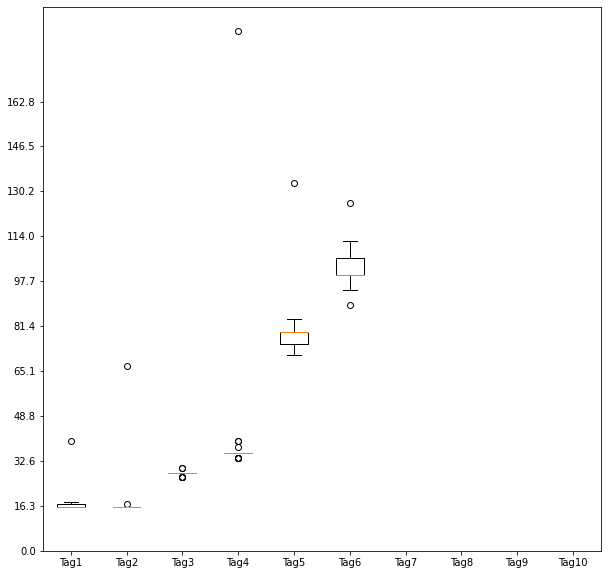

In [67]:
fig, ax = plt.subplots(figsize=(10,10))
ax.boxplot(pltdata)
ax.set_xticklabels(['Tag1', 'Tag2', 'Tag3', 'Tag4', 'Tag5', 'Tag6', 'Tag7', 'Tag8', 'Tag9', 'Tag10'])
ax.set_yticks(np.arange(0, 179.08, 16.28))